In [1]:
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [2]:
lem = WordNetLemmatizer() #create lemmatizer

In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kseniapavlina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
dictionary = pd.read_csv('../data/processedDict.csv')
dictionary

,word,cat_lev1,cat_lev2,cat_lev3,ndf
0,information,business,professional_conduct_host,advice,0.008904
1,recommendations,business,professional_conduct_host,advice,0.008375
2,tips,business,professional_conduct_host,advice,0.008399
3,advice,business,professional_conduct_host,advice,0.007568
4,suggestions,business,professional_conduct_host,advice,0.007580
...,...,...,...,...,...
347,talking,social,social_interaction,talking,0.001961
348,chatting,social,social_interaction,talking,0.001408
349,moments,social,social_interaction,talking,0.001155
350,chats,social,social_interaction,talking,0.000553


In [5]:
dictionary[70:]

,word,cat_lev1,cat_lev2,cat_lev3,ndf
70,welcome,business,professional_conduct_host,personality_host2,0.009818
71,responsive,business,professional_conduct_host,personality_host2,0.009638
72,help,business,professional_conduct_host,personality_host2,0.008736
73,welcomed,business,professional_conduct_host,personality_host2,0.008543
74,needs,business,professional_conduct_host,personality_host2,0.008567
...,...,...,...,...,...
347,talking,social,social_interaction,talking,0.001961
348,chatting,social,social_interaction,talking,0.001408
349,moments,social,social_interaction,talking,0.001155
350,chats,social,social_interaction,talking,0.000553


In [6]:
dictionary['word'] = dictionary['word'].apply(lambda x: lem.lemmatize(x, pos='n'))

In [7]:
dictionary.describe()

,ndf
count,352.000000
mean,0.006195
std,0.002955
min,0.000036
25%,0.003706
50%,0.006419
75%,0.009169
max,0.009999


In [8]:
filepath = '../data/en_reviews/Manchester.csv'
reviews = pd.read_csv(filepath)

# reviews = reviews['date']
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
0,0,68951,993691,2012-03-12,1602133,Leopoldo,Comfy and cosy space with a welcome survival k...,en
1,1,68951,1305184,2012-05-19,2093255,Deepthi,We stayed with Paul for 2 nights on a business...,en
2,2,68951,1369794,2012-05-29,337778,Graham,What a fantastic place. We stayed for a week ...,en
3,3,68951,1470176,2012-06-12,1829716,Kira,The house is very comfortable and the hosts ar...,en
4,4,68951,1607783,2012-07-02,323672,Peter,My friends and I had a great stay at Paul and ...,en
...,...,...,...,...,...,...,...,...
132579,144022,42135683,604472776,2020-02-11,326617985,Effanga,Steve's place is quite basic but had everythin...,en
132580,144023,42135683,605332428,2020-02-14,30514766,Gökçe,It was great experience. It is quite and big r...,en
132581,144024,42135683,605817713,2020-02-15,103013271,Rich,Was beyond my expectations and super friendly,en
132582,144026,42167098,606283081,2020-02-16,221655974,Karl,"Well thought out character property, extremely...",en


In [9]:
table = str.maketrans('', '', string.punctuation) #mapping to strip punctuation in review

In [10]:
#strip punct of each review -> lemmatise -> output is list of words so join into sentences
reviews['comments'] = reviews.comments.apply(lambda review: ' '.join(map(str, [lem.lemmatize(word.translate(table), pos='n') for word in review.lower().split()])))
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
0,0,68951,993691,2012-03-12,1602133,Leopoldo,comfy and cosy space with a welcome survival k...,en
1,1,68951,1305184,2012-05-19,2093255,Deepthi,we stayed with paul for 2 night on a business ...,en
2,2,68951,1369794,2012-05-29,337778,Graham,what a fantastic place we stayed for a week an...,en
3,3,68951,1470176,2012-06-12,1829716,Kira,the house is very comfortable and the host are...,en
4,4,68951,1607783,2012-07-02,323672,Peter,my friend and i had a great stay at paul and d...,en
...,...,...,...,...,...,...,...,...
132579,144022,42135683,604472776,2020-02-11,326617985,Effanga,steves place is quite basic but had everything...,en
132580,144023,42135683,605332428,2020-02-14,30514766,Gökçe,it wa great experience it is quite and big roo...,en
132581,144024,42135683,605817713,2020-02-15,103013271,Rich,wa beyond my expectation and super friendly,en
132582,144026,42167098,606283081,2020-02-16,221655974,Karl,well thought out character property extremely ...,en


In [11]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [12]:
#### DELETE THIS LATER ###
mask = (reviews['date'] >= '2014-01-01') & (reviews['date'] < '2017-01-01')
reviews = reviews.loc[mask].copy()
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en
...,...,...,...,...,...,...,...,...
86043,93320,22998816,114721823,2016-11-20,17891046,Jenna,good communication from hannah throughout the ...,en
86044,93321,22998816,115523089,2016-11-25,87436659,Robert,staying at the heart in medium city salford is...,en
86045,93322,22998816,115817172,2016-11-27,43982844,Norhana,clean neat and modern apartment checking in an...,en
86046,93323,22998816,116911347,2016-12-04,81715843,Jack,nice place easy check inout great location,en


In [13]:
reviews.describe()

,Unnamed: 0,listing_id,id,reviewer_id
count,14345.000000,1.434500e+04,1.434500e+04,1.434500e+04
mean,21163.900593,6.908528e+06,7.470300e+07,3.941796e+07
std,14463.274300,4.634942e+06,3.232748e+07,2.788372e+07
min,14.000000,6.895100e+04,9.515059e+06,2.477000e+03
25%,9220.000000,3.484629e+06,4.995473e+07,1.668028e+07
50%,19150.000000,6.449708e+06,7.720780e+07,3.376953e+07
75%,32263.000000,1.115365e+07,1.050758e+08,5.789935e+07
max,93324.000000,2.299882e+07,1.240321e+08,1.086679e+08


In [14]:
allwords = reviews['comments'].tolist()
allwords = " ".join(allwords)
unique_words = set(allwords.split(' '))
len(unique_words)

12792

In [15]:
unique_words = list(unique_words)
unique_words = [string for string in unique_words if string != ""]
len(unique_words)

12791

In [16]:
unique_words[2]

'requires'

In [17]:
ls = []
for word in unique_words:
    word = ''.join([i for i in word if not i.isdigit()])
    ls += [word]
# result = ''.join([i for i in s if not i.isdigit()])
unique_words= ls
unique_words = [string for string in unique_words if string != ""]
len(unique_words)

12640

In [18]:
def countWords(word, review):
    count = 0
    for i in review:
        if i == word:
            count+=1
    return count

In [19]:
import math
def getDenom(review, unique_words):
    count = 0
    den = 0
    ls = []
    review = review.split()
    for word in review:
        kmp = countWords(word, review)
        if (kmp > 0 and word not in ls):
            ls += [word]
            den += math.log(1 + kmp)
    return den

In [20]:
reviews['den'] = reviews['comments'].apply(lambda x: getDenom(x, unique_words))
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,9.416378
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,17.734145
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,40.827819
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,102.038993
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,22.403853
...,...,...,...,...,...,...,...,...,...
86043,93320,22998816,114721823,2016-11-20,17891046,Jenna,good communication from hannah throughout the ...,en,66.948723
86044,93321,22998816,115523089,2016-11-25,87436659,Robert,staying at the heart in medium city salford is...,en,50.585124
86045,93322,22998816,115817172,2016-11-27,43982844,Norhana,clean neat and modern apartment checking in an...,en,29.923112
86046,93323,22998816,116911347,2016-12-04,81715843,Jack,nice place easy check inout great location,en,4.852030


In [21]:
def getNom(category, review, dictionary):
    nom = 0
    review = review.split()
    dictionaryWords = dictionary[(dictionary['cat_lev1'] == category)]
    dictionaryWords = dictionaryWords['word']
    for word in dictionaryWords:
        nom += math.log(1 + review.count(word))
    return nom

In [22]:
# reviews['meal0'] = reviews['comments'].apply(lambda x: getNom('meal', x, dictionary))
# reviews

In [23]:
# reviews['meal'] = reviews['meal0']*100/reviews['den']
# reviews

In [24]:
# reviews['people0'] = reviews['comments'].apply(lambda x: getNom('people', x, dictionary))
# reviews['people'] = reviews['people0']*100/reviews['den']
# reviews

In [25]:
# k_meal = reviews['meal'].loc[reviews['meal'] > 0]
# k_meal = k_meal.min()
# print(k_meal)

In [26]:
# reviews['personality_host0'] = reviews['comments'].apply(lambda x: getNom('personality_host', x, dictionary))
# reviews['personality_host'] = reviews['personality_host0']*100/reviews['den']

In [27]:
reviews['business0'] = reviews['comments'].apply(lambda x: getNom('business', x, dictionary))
reviews['business'] = reviews['business0']*100/reviews['den']

In [28]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,business0,business
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,9.416378,0.693147,7.361080
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,17.734145,2.079442,11.725638
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,40.827819,9.010913,22.070523
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,102.038993,22.703958,22.250276
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,22.403853,6.931472,30.938748
...,...,...,...,...,...,...,...,...,...,...,...
86043,93320,22998816,114721823,2016-11-20,17891046,Jenna,good communication from hannah throughout the ...,en,66.948723,16.060168,23.988760
86044,93321,22998816,115523089,2016-11-25,87436659,Robert,staying at the heart in medium city salford is...,en,50.585124,5.950643,11.763621
86045,93322,22998816,115817172,2016-11-27,43982844,Norhana,clean neat and modern apartment checking in an...,en,29.923112,6.931472,23.164275
86046,93323,22998816,116911347,2016-12-04,81715843,Jack,nice place easy check inout great location,en,4.852030,2.079442,42.857143


In [29]:
# reviews['meal'] = reviews['comments'].apply(lambda x: adoptionForOneReview('meal', x, dictionary))
# reviews1['people'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('people', x, dictionary, unique_words))
# reviews['personality_host0'] = reviews['comments'].apply(lambda x: getNom('personality_host', x, dictionary))
# # reviews['personality_host'] = reviews['personality_host0']*100/reviews['den']
# reviews['sharing0'] = reviews['comments'].apply(lambda x: getNom('sharing', x, dictionary))
# reviews['sharing'] = reviews['sharing0']*100/reviews['den']
# reviews['talking0'] = reviews['comments'].apply(lambda x: getNom('talking', x, dictionary))
# reviews['talking'] = reviews['talking0']*100/reviews['den']


# reviews1['personality_host'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('personality_host', x, dictionary, unique_words))
# reviews1['sharing'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('sharing', x, dictionary, unique_words))
# reviews1['talking'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('talking', x, dictionary, unique_words))
# reviews

In [30]:
# reviews['interiors0'] = reviews['comments'].apply(lambda x: getNom('interiors', x, dictionary))
# reviews['interiors'] = reviews['interiors0']*100/reviews['den']
# reviews['communication0'] = reviews['comments'].apply(lambda x: getNom('communication', x, dictionary))
# reviews['communication'] = reviews['communication0']*100/reviews['den']
# reviews['advice0'] = reviews['comments'].apply(lambda x: getNom('advice', x, dictionary))
# reviews['advice'] = reviews['advice0']*100/reviews['den']
# reviews['logistic0'] = reviews['comments'].apply(lambda x: getNom('logistic', x, dictionary))
# reviews['logistic'] = reviews['logistic0']*100/reviews['den']
# # reviews['personality_host20'] = reviews['comments'].apply(lambda x: getNom('personality_host2', x, dictionary))
# # reviews['personality_host2'] = reviews['personality_host20']*100/reviews['den']
# reviews['location0'] = reviews['comments'].apply(lambda x: getNom('location', x, dictionary))
# reviews['location'] = reviews['location0']*100/reviews['den']
# reviews['property_type0'] = reviews['comments'].apply(lambda x: getNom('property_type', x, dictionary))
# reviews['property_type'] = reviews['property_type0']*100/reviews['den']
# reviews['facilities0'] = reviews['comments'].apply(lambda x: getNom('facilities', x, dictionary))
# reviews['facilities'] = reviews['facilities0']*100/reviews['den']

# # reviews['business'] = reviews['comments'].apply(lambda x: adoptionForOneReview('business', x, dictionary))
# # reviews1['communication'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('communication', x, dictionary, unique_words))
# # reviews1['advice'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('advice', x, dictionary, unique_words))
# # reviews1['logistic'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('logistic', x, dictionary, unique_words))
# # reviews1['personality_host2'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('personality_host2', x, dictionary, unique_words))
# # reviews1['location'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('location', x, dictionary, unique_words))
# # reviews1['property_type'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('property_type', x, dictionary, unique_words))
# # reviews1['facilities'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('facilities', x, dictionary, unique_words))
# # reviews1['interiors'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('interiors', x, dictionary, unique_words))

# reviews

In [31]:
# reviews['personality_host20'] = reviews['comments'].apply(lambda x: getNom('personality_host2', x, dictionary))
# reviews['personality_host2'] = reviews['personality_host20']*100/reviews['den']

In [32]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,business0,business
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,9.416378,0.693147,7.361080
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,17.734145,2.079442,11.725638
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,40.827819,9.010913,22.070523
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,102.038993,22.703958,22.250276
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,22.403853,6.931472,30.938748
...,...,...,...,...,...,...,...,...,...,...,...
86043,93320,22998816,114721823,2016-11-20,17891046,Jenna,good communication from hannah throughout the ...,en,66.948723,16.060168,23.988760
86044,93321,22998816,115523089,2016-11-25,87436659,Robert,staying at the heart in medium city salford is...,en,50.585124,5.950643,11.763621
86045,93322,22998816,115817172,2016-11-27,43982844,Norhana,clean neat and modern apartment checking in an...,en,29.923112,6.931472,23.164275
86046,93323,22998816,116911347,2016-12-04,81715843,Jack,nice place easy check inout great location,en,4.852030,2.079442,42.857143


In [33]:
k_business= reviews['business'].loc[reviews['business'] > 0]
# k_advice = reviews['advice'].loc[reviews['advice'] > 0]
# k_personality_host2 = reviews['personality_host2'].loc[reviews['personality_host2'] > 0]
# k_logistic= reviews['logistic'].loc[reviews['logistic'] > 0]
# k_location = reviews['location'].loc[reviews['location'] > 0]
# k_property_type= reviews['property_type'].loc[reviews['property_type'] > 0]
# k_facilities = reviews['facilities'].loc[reviews['facilities'] > 0]
# k_interiors = reviews['interiors'].loc[reviews['interiors'] > 0]

k_business = k_business.min()
# k_advice = k_advice.min()
# k_personality_host2 = k_personality_host2.min()
# k_logistic = k_logistic.min()
# k_location = k_location.min()
# k_property_type = k_property_type.min()
# k_facilities = k_facilities.min()
# k_interiors = k_interiors.min()
print(k_business)
# print(k_advice)
# print(k_personality_host2)
# print(k_logistic)
# print(k_location)
# print(k_property_type)
# print(k_facilities)
# print(k_interiors)

1.5506988202813545


In [34]:
# k_meal = reviews['meal'].loc[reviews['meal'] > 0]
# k_people = reviews['people'].loc[reviews['people'] > 0]
# k_personality_host = reviews['personality_host'].loc[reviews['personality_host'] > 0]
# k_sharing = reviews['sharing'].loc[reviews['sharing'] > 0]
# k_talking = reviews['talking'].loc[reviews['talking'] > 0]
# k_meal = k_meal.min()
# k_people = k_people.min()
# k_personality_host = k_personality_host.min()
# k_sharing = k_sharing.min()
# k_talking = k_talking.min()
# print(k_meal)
# print(k_people)
# print(k_personality_host)
# print(k_sharing)
# print(k_talking)

In [35]:
# mask = (reviews['date'] >= '2015-01-01') & (reviews['date'] < '2016-01-01')
# setOfReviews = reviews.loc[mask]
# print(len(setOfReviews))
# setOfReviews = setOfReviews['meal']
# setOfReviews = setOfReviews.loc[setOfReviews > 0]
# setOfReviews = setOfReviews[:3]
# print(len(setOfReviews))
# setOfReviews

In [36]:
# k_meal

In [37]:
# b = 1/len(setOfReviews)
# adoption = 1
# for review in setOfReviews:
#     adoption *= math.pow((review + k_meal),b)
# adoption = adoption - k_meal
# adoption

In [38]:
def adoptionForSetOfReviews(category, setOfReviews, dictionary, startDate, endDate, k):
    adoption = 1
    mask = (setOfReviews['date'] >= startDate) & (setOfReviews['date'] < endDate)
    setOfReviews = setOfReviews.loc[mask]
#     print(len(setOfReviews))
    setOfReviews = setOfReviews[category]
#     print(len(setOfReviews))
    if (len(setOfReviews) == 0):
        return 0
    else:
        b = 1/len(setOfReviews)
        for review in setOfReviews:
            adoption *= math.pow((review + k),b)
        adoption = adoption - k
        return adoption

In [39]:
d2 = {'Year' : [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 'value':0.0}
business_out = pd.DataFrame(data=d2)
business_out

,Year,value
0,2010,0.0
1,2011,0.0
2,2012,0.0
3,2013,0.0
4,2014,0.0
5,2015,0.0
6,2016,0.0
7,2017,0.0
8,2018,0.0
9,2019,0.0


In [40]:
# d2 = {'Year': [2010, 2011,2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012,2012,
#               2013, 2013,2013, 2013, 2013, 2013, 2013, 2013,2014,2014, 2014, 2014, 2014, 2014,2014, 2014, 2015, 2015,2015, 2015, 2015, 2015, 2015, 2015, 
#               2016, 2016,2016, 2016, 2016, 2016,2016, 2016, 2017,2017, 2017, 2017, 2017, 2017, 2017, 2017,2018, 2018, 2018, 2018, 2018,2018,2018, 2018,
#               2019, 2019, 2019,2019, 2019, 2019, 2019, 2019], 'Business sub-category' : ['location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                           'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                           'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                           'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                           'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                         'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                                                   'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                         'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
#                                                                         'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                     
#                                                                           'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors'], 'value':0.0}
# business_out = pd.DataFrame(data=d2)
# business_out

In [41]:
# d = {'Year': [2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 
#               2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 
#               2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 
#               2019, 2019, 2019, 2019, 2019], 'Social sub-category' : ['meal', 'people', 'personality_host', 'sharing', 'talking', 
#                                                           'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
#                                                           'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
#                                                           'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
#                                                           'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
#                                                           'meal', 'people', 'personality_host', 'sharing', 'talking'], 'value':0.0}
# social_out = pd.DataFrame(data=d)
# social_out

In [42]:
business_out.at[0, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2010-01-01', '2011-01-01', k_business)
business_out.at[1, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2011-01-01', '2012-01-01', k_business)
business_out.at[2, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2012-01-01', '2013-01-01', k_business)
business_out.at[3, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2013-01-01', '2014-01-01', k_business)
business_out.at[4, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2014-01-01', '2015-01-01', k_business)
business_out.at[5, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2015-01-01', '2016-01-01', k_business)
business_out.at[6, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2016-01-01', '2017-01-01', k_business)
business_out.at[7, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2017-01-01', '2018-01-01', k_business)
business_out.at[8, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2018-01-01', '2019-01-01', k_business)
business_out.at[9, 'value'] = adoptionForSetOfReviews('business', reviews, dictionary, '2019-01-01', '2020-01-01', k_business)

In [43]:
# business_out.at[0, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2010-01-01', '2011-01-01', k_location)
# business_out.at[8, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2011-01-01', '2012-01-01', k_location)
# business_out.at[16, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2012-01-01', '2013-01-01', k_location)
# business_out.at[24, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2013-01-01', '2014-01-01', k_location)
# business_out.at[32, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2014-01-01', '2015-01-01', k_location)
# business_out.at[40, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2015-01-01', '2016-01-01', k_location)
# business_out.at[48, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2016-01-01', '2017-01-01', k_location)
# business_out.at[56, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2017-01-01', '2018-01-01', k_location)
# business_out.at[64, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2018-01-01', '2019-01-01', k_location)
# business_out.at[72, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2019-01-01', '2020-01-01', k_location)

# business_out.at[1, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2010-01-01', '2011-01-01', k_communication)
# business_out.at[9, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2011-01-01', '2012-01-01', k_communication)
# business_out.at[17, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2012-01-01', '2013-01-01', k_communication)
# business_out.at[25, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2013-01-01', '2014-01-01', k_communication)
# business_out.at[33, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2014-01-01', '2015-01-01', k_communication)
# business_out.at[41, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2015-01-01', '2016-01-01', k_communication)
# business_out.at[49, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2016-01-01', '2017-01-01', k_communication)
# business_out.at[57, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2017-01-01', '2018-01-01', k_communication)
# business_out.at[65, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2018-01-01', '2019-01-01', k_communication)
# business_out.at[73, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2019-01-01', '2020-01-01', k_communication)

# business_out.at[2, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2010-01-01', '2011-01-01', k_personality_host2)
# business_out.at[10, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2011-01-01', '2012-01-01', k_personality_host2)
# business_out.at[18, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2012-01-01', '2013-01-01', k_personality_host2)
# business_out.at[25, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2013-01-01', '2014-01-01', k_personality_host2)
# business_out.at[34, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2014-01-01', '2015-01-01', k_personality_host2)
# business_out.at[42, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2015-01-01', '2016-01-01', k_personality_host2)
# business_out.at[50, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2016-01-01', '2017-01-01', k_personality_host2)
# business_out.at[58, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2017-01-01', '2018-01-01', k_personality_host2)
# business_out.at[66, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2018-01-01', '2019-01-01', k_personality_host2)
# business_out.at[74, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2019-01-01', '2020-01-01', k_personality_host2)

# business_out.at[3, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2010-01-01', '2011-01-01', k_property_type)
# business_out.at[11, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2011-01-01', '2012-01-01', k_property_type)
# business_out.at[19, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2012-01-01', '2013-01-01', k_property_type)
# business_out.at[26, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2013-01-01', '2014-01-01', k_property_type)
# business_out.at[35, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2014-01-01', '2015-01-01', k_property_type)
# business_out.at[43, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2015-01-01', '2016-01-01', k_property_type)
# business_out.at[51, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2016-01-01', '2017-01-01', k_property_type)
# business_out.at[59, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2017-01-01', '2018-01-01', k_property_type)
# business_out.at[67, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2018-01-01', '2019-01-01', k_property_type)
# business_out.at[75, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2019-01-01', '2020-01-01', k_property_type)

# business_out.at[4, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2010-01-01', '2011-01-01', k_logistic)
# business_out.at[12, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2011-01-01', '2012-01-01', k_logistic)
# business_out.at[20, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2012-01-01', '2013-01-01', k_logistic)
# business_out.at[27, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2013-01-01', '2014-01-01', k_logistic)
# business_out.at[36, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2014-01-01', '2015-01-01', k_logistic)
# business_out.at[44, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2015-01-01', '2016-01-01', k_logistic)
# business_out.at[52, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2016-01-01', '2017-01-01', k_logistic)
# business_out.at[60, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2017-01-01', '2018-01-01', k_logistic)
# business_out.at[68, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2018-01-01', '2019-01-01', k_logistic)
# business_out.at[76, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2019-01-01', '2020-01-01', k_logistic)

# business_out.at[5, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2010-01-01', '2011-01-01', k_advice)
# business_out.at[13, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2011-01-01', '2012-01-01', k_advice)
# business_out.at[21, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2012-01-01', '2013-01-01', k_advice)
# business_out.at[29, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2013-01-01', '2014-01-01', k_advice)
# business_out.at[37, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2014-01-01', '2015-01-01', k_advice)
# business_out.at[45, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2015-01-01', '2016-01-01', k_advice)
# business_out.at[53, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2016-01-01', '2017-01-01', k_advice)
# business_out.at[61, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2017-01-01', '2018-01-01', k_advice)
# business_out.at[69, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2018-01-01', '2019-01-01', k_advice)
# business_out.at[77, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2019-01-01', '2020-01-01', k_advice)

# business_out.at[6, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2010-01-01', '2011-01-01', k_facilities)
# business_out.at[14, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2011-01-01', '2012-01-01', k_facilities)
# business_out.at[22, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2012-01-01', '2013-01-01', k_facilities)
# business_out.at[30, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2013-01-01', '2014-01-01', k_facilities)
# business_out.at[38, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2014-01-01', '2015-01-01', k_facilities)
# business_out.at[46, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2015-01-01', '2016-01-01', k_facilities)
# business_out.at[54, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2016-01-01', '2017-01-01', k_facilities)
# business_out.at[62, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2017-01-01', '2018-01-01', k_facilities)
# business_out.at[70, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2018-01-01', '2019-01-01', k_facilities)
# business_out.at[78, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2019-01-01', '2020-01-01', k_facilities)

# business_out.at[7, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2010-01-01', '2011-01-01', k_interiors)
# business_out.at[15, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2011-01-01', '2012-01-01', k_interiors)
# business_out.at[23, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2012-01-01', '2013-01-01', k_interiors)
# business_out.at[31, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2013-01-01', '2014-01-01', k_interiors)
# business_out.at[39, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2014-01-01', '2015-01-01', k_interiors)
# business_out.at[47, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2015-01-01', '2016-01-01', k_interiors)
# business_out.at[55, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2016-01-01', '2017-01-01', k_interiors)
# business_out.at[63, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2017-01-01', '2018-01-01', k_interiors)
# business_out.at[71, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2018-01-01', '2019-01-01', k_interiors)
# business_out.at[79, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2019-01-01', '2020-01-01', k_interiors)

# # # print(adoptionForSetOfReviews('location', reviews, dictionary, '2010-01-01', '2011-01-01', k_location))
# business_out


In [44]:
# social_out.at[0, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2010-01-01', '2011-01-01', k_meal)
# social_out.at[5, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2011-01-01', '2012-01-01', k_meal)
# social_out.at[10, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2012-01-01', '2013-01-01', k_meal)
# social_out.at[15, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2013-01-01', '2014-01-01', k_meal)
# social_out.at[20, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2014-01-01', '2015-01-01', k_meal)
# social_out.at[25, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2015-01-01', '2016-01-01', k_meal)
# social_out.at[30, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2016-01-01', '2017-01-01', k_meal)
# social_out.at[35, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2017-01-01', '2018-01-01', k_meal)
# social_out.at[40, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2018-01-01', '2019-01-01', k_meal)
# social_out.at[45, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2019-01-01', '2020-01-01', k_meal)

# social_out.at[1, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2010-01-01', '2011-01-01', k_people)
# social_out.at[6, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2011-01-01', '2012-01-01', k_people)
# social_out.at[11, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2012-01-01', '2013-01-01', k_people)
# social_out.at[16, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2013-01-01', '2014-01-01', k_people)
# social_out.at[21, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2014-01-01', '2015-01-01', k_people)
# social_out.at[26, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2015-01-01', '2016-01-01', k_people)
# social_out.at[31, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2016-01-01', '2017-01-01', k_people)
# social_out.at[36, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2017-01-01', '2018-01-01', k_people)
# social_out.at[41, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2018-01-01', '2019-01-01', k_people)
# social_out.at[46, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2019-01-01', '2020-01-01', k_people)

# social_out.at[2, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2010-01-01', '2011-01-01', k_personality_host)
# social_out.at[7, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2011-01-01', '2012-01-01', k_personality_host)
# social_out.at[12, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2012-01-01', '2013-01-01', k_personality_host)
# social_out.at[17, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2013-01-01', '2014-01-01', k_personality_host)
# social_out.at[22, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2014-01-01', '2015-01-01', k_personality_host)
# social_out.at[27, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2015-01-01', '2016-01-01', k_personality_host)
# social_out.at[32, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2016-01-01', '2017-01-01', k_personality_host)
# social_out.at[37, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2017-01-01', '2018-01-01', k_personality_host)
# social_out.at[42, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2018-01-01', '2019-01-01', k_personality_host)
# social_out.at[47, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2019-01-01', '2020-01-01', k_personality_host)

# social_out.at[3, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2010-01-01', '2011-01-01', k_sharing)
# social_out.at[8, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2011-01-01', '2012-01-01', k_sharing)
# social_out.at[13, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2012-01-01', '2013-01-01', k_sharing)
# social_out.at[18, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2013-01-01', '2014-01-01', k_sharing)
# social_out.at[23, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2014-01-01', '2015-01-01', k_sharing)
# social_out.at[28, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2015-01-01', '2016-01-01', k_sharing)
# social_out.at[33, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2016-01-01', '2017-01-01', k_sharing)
# social_out.at[38, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2017-01-01', '2018-01-01', k_sharing)
# social_out.at[43, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2018-01-01', '2019-01-01', k_sharing)
# social_out.at[48, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2019-01-01', '2020-01-01', k_sharing)

# social_out.at[4, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2010-01-01', '2011-01-01', k_talking)
# social_out.at[9, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2011-01-01', '2012-01-01', k_talking)
# social_out.at[14, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2012-01-01', '2013-01-01', k_talking)
# social_out.at[19, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2013-01-01', '2014-01-01', k_talking)
# social_out.at[24, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2014-01-01', '2015-01-01', k_talking)
# social_out.at[29, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2015-01-01', '2016-01-01', k_talking)
# social_out.at[34, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2016-01-01', '2017-01-01', k_talking)
# social_out.at[39, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2017-01-01', '2018-01-01', k_talking)
# social_out.at[44, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2018-01-01', '2019-01-01', k_talking)
# social_out.at[49, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2019-01-01', '2020-01-01', k_talking)
# # # print(adoptionForSetOfReviews('meal', reviews, dictionary, '2010-01-01', '2011-01-01', k_meal))
# social_out


In [45]:
# for2010b = adoptionForSetOfReviews('business', reviews, dictionary, '2010-01-01', '2011-01-01', k_business)
# for2011b = adoptionForSetOfReviews('business', reviews, dictionary, '2011-01-01', '2012-01-01', k_business)
# for2012b = adoptionForSetOfReviews('business', reviews, dictionary, '2012-01-01', '2013-01-01', k_business)
# for2013b = adoptionForSetOfReviews('business', reviews, dictionary, '2013-01-01', '2014-01-01', k_business)
# for2014b = adoptionForSetOfReviews('business', reviews, dictionary, '2014-01-01', '2015-01-01', k_business)
# for2015b = adoptionForSetOfReviews('business', reviews, dictionary, '2015-01-01', '2016-01-01', k_business)
# for2016b = adoptionForSetOfReviews('business', reviews, dictionary, '2016-01-01', '2017-01-01', k_business)
# for2017b = adoptionForSetOfReviews('business', reviews, dictionary, '2017-01-01', '2018-01-01', k_business)
# for2018b = adoptionForSetOfReviews('business', reviews, dictionary, '2018-01-01', '2019-01-01', k_business)
# for2019b = adoptionForSetOfReviews('business', reviews, dictionary, '2019-01-01', '2020-01-01', k_business)

# print("business")
# print("2010 = ",for2010b)
# print("2011 = ",for2011b)
# print("2012 = ",for2012b)
# print("2013 = ",for2013b)
# print("2014 = ",for2014b)
# print("2015 = ",for2015b)
# print("2016 = ",for2016b)
# print("2017 = ",for2017b)
# print("2018 = ",for2018b)
# print("2019 = ",for2019b)




<BarContainer object of 10 artists>

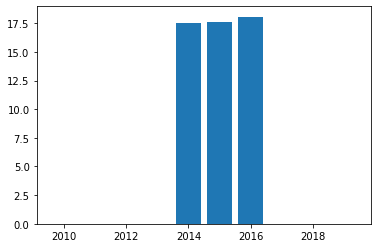

In [46]:
# ax = fig
plt.bar(business_out.Year, business_out.value)

In [47]:
# business_out = business_out.loc[business_out['Year'] != 2010]
# business_out = business_out.loc[business_out['Year'] != 2019]
# pivot_business = business_out.pivot(index='Year', values='value')
# pivot_business

In [48]:
# # social_out = social_out.loc[social_out['Year'] != 2010]
# # social_out = social_out.loc[social_out['Year'] != 2019]
# pivot_social = social_out.pivot(index='Year', columns='Social sub-category', values='value')
# pivot_social

In [49]:
# ax = pivot_business.loc[:,['location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities', 'interiors']].plot.bar(stacked=True, figsize=(10,7), color=['#143258','#235BA0','#70A9C1','#B1CEDB','#16B9FF','#BCEBFF','#119DAF', '#DFC3D4'])
ax = pivot_business.loc[:, 'business', color=r]
plt.title("Manchester")
ax.get_legend().remove()

SyntaxError: invalid syntax (<ipython-input-49-e69adc262cbc>, line 2)

In [ ]:
# ax = pivot_social.loc[:,['meal','people', 'personality_host', 'sharing', 'talking']].plot.bar(stacked=True, figsize=(10,7), color=['#351800','#D85907','#D88A07','#FFA900','#FFD70F'])
# plt.title("Manchester")
# ax.get_legend().remove()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Create a color palette
palette = dict(zip(['meal','people', 'personality_host', 'sharing', 'talking'], ['#351800','#D85907','#D88A07','#FFA900','#FFD70F']))
# Create legend handles manually
handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
plt.legend(title='Social subcategories', handles=handles, ncol=4)
# Get current axes object and turn off axis
plt.gca().set_axis_off()
plt.show()

In [ ]:
# Create a color palette
palette = dict(zip(['location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities', 'interiors'], ['#143258','#235BA0','#70A9C1','#B1CEDB','#16B9FF','#BCEBFF','#119DAF', '#DFC3D4']))
# Create legend handles manually
handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
plt.legend(title='Business subcategories', handles=handles, ncol=4)
# Get current axes object and turn off axis
plt.gca().set_axis_off()
plt.show()